In [39]:
%load_ext autoreload
%autoreload 2

%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


El sistema no puede encontrar la ruta especificada.


In [1]:
import sys
import pickle

# Se agrega el path para poder importar los modulos locales
if "../" not in sys.path:
    sys.path.append("../")

import pandas as pd
import matplotlib.pyplot as plt

import shap

d:\anaconda3\envs\ame{{environment}}\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
X = pd.read_parquet("data/variablesTest.parquet")
X2 = pd.read_parquet("data/variables.parquet")
Yreal= pd.read_parquet("../../resources/flights_clean.parquet")

In [7]:
#open a model with pickle
with open('models/xgb_pasajeros_model.pickle', 'rb') as file:
    model = pickle.load(file)
#open a model with pickle
with open('models/xgb_bookings_model.pickle', 'rb') as file:
    model2 = pickle.load(file)

In [8]:
y_pred = model.predict(X)
y_pred2 = model.predict(X)

In [9]:
X["Passengers"] = y_pred
X["Bookings"] = y_pred

In [10]:
#export data to parquet
X.to_parquet("data/files2024Test.parquet")

---


In [78]:
Enero23= Yreal[Yreal["Mes"]==1]


In [79]:
Enero23=Enero23.groupby("Semana")["Passengers"].mean()
Enero24=X.groupby("Semana")["Passengers"].mean()


In [81]:
Enero24.shape

(5,)

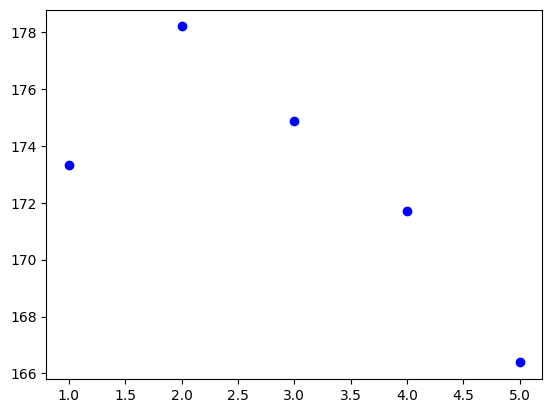

In [83]:
#scatter plot of passengers vs time
plt.scatter(Enero23.index,Enero23, color='blue')

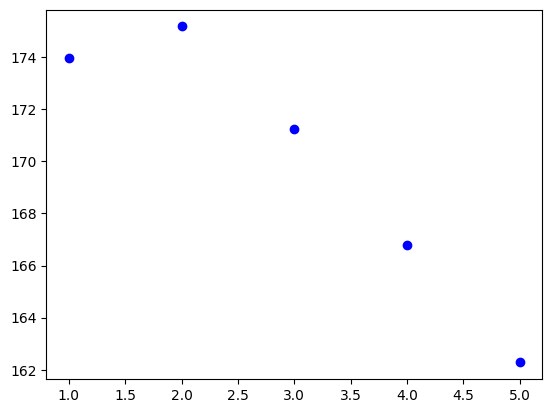

In [82]:
plt.scatter(Enero24.index,Enero24, color='blue')